In [1]:
import pandas as pd
file = pd.read_csv("/Users/sauhilfaraz/Downloads/News_0.csv.csv")
data_news = pd.DataFrame(file)
data_news

,Word_Count,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","I’m not an immigrant, but my grandparents are....",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [2]:
import re, string, unicodedata
import nltk
# import contractions
# import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [3]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
    
data_news.replace(data_news["text"], denoise_text(data_news["text"].any()))

,Word_Count,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","I’m not an immigrant, but my grandparents are....",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [4]:
# def replace_contractions(text):
#     return contractions.fix(text)

# data_news.replace(data_news["text"], replace_contractions(data_news["text"].any()))

In [5]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
#     words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems, lemmas

data_news['text'] = remove_non_ascii(data_news['text'])
data_news['text'] = to_lowercase(data_news['text'])
data_news['text'] = remove_punctuation(data_news['text'])
data_news['text'] = remove_stopwords(data_news['text'])
data_news['text'] = stem_words(data_news['text'])
data_news['text'] = lemmatize_verbs(data_news['text'])

In [6]:
# import nltk
# nltk.download('wordnet')
#nltk.download('vader_lexicon')

In [7]:
data_news['text'] = data_news['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data_news.head()

,Word_Count,title,text,label
0,8476,You Can Smell Hillary’s Fear,daniel greenfield shillman journalism fellow f...,FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,secretary state john kerry said monday that wi...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,kaydee king kaydeeking november 2016 lesson fr...,FAKE
4,875,The Battle of New York: Why This Primary Matters,primary york frontrunners hillary clinton dona...,REAL


In [8]:
"""We want to check the distribution between fake news and real news in our dataset to make sure that
there isn't an uneven distribution. If there's an uneven distribution such that there's a significantly 
higher amount of fake news than real news, then it would be difficult to analyze the dataset. Additionally,
it would be difficult to create a machine learning model to predict fake news vs real news because the model
could become bias if given an uneven dataset"""

realNews = 0
fakeNews = 0
for i in range(0, len(data_news)):
    if(data_news['label'][i] == 'REAL'):
        realNews += 1
    else:
        fakeNews += 1

"""The dataset distribution between fake news and real news is even"""
print(len(data_news))
print(realNews)
print(fakeNews)

6335
3171
3164


In [9]:
realNewsText = []
fakeNewsText = []

for i in range(0, len(data_news)):
    if(data_news['label'][i] == 'REAL'):
        realNewsText.append(data_news['text'][i])
    else:
        fakeNewsText.append(data_news['text'][i])

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_scores(sentences):
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
    for i in range(0, len(sentences)):
        # polarity_scores method of SentimentIntensityAnalyzer 
        sentiment_dict = sid_obj.polarity_scores(sentences[i]) 
      
    print("Overall sentiment dictionary is : ", sentiment_dict) 
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 

In [11]:
"""Based on the results below we can see that the text from the real news articles and fake news articles
are primarly neutral. However, it's interesting to see that the text from the fake news articles has a greater 
negative sentiment score and positive sentiment score compared to real news text. It seems that based off the sentiment analysis
we can determine that real news articles are less bias than fake news articles."""

sentiment_scores(realNewsText)
sentiment_scores(fakeNewsText)

Overall sentiment dictionary is :  {'neg': 0.093, 'neu': 0.805, 'pos': 0.102, 'compound': 0.4811}
sentence was rated as  9.3 % Negative
sentence was rated as  80.5 % Neutral
sentence was rated as  10.2 % Positive
Overall sentiment dictionary is :  {'neg': 0.167, 'neu': 0.719, 'pos': 0.114, 'compound': -0.997}
sentence was rated as  16.7 % Negative
sentence was rated as  71.89999999999999 % Neutral
sentence was rated as  11.4 % Positive


In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
  
# function to print sentiments of the sentence. 
def negative_sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    negativeSentiment = sentiment_dict['neg']*100
    return negativeSentiment

In [13]:
negative_RealNewsTitles = []
negative_FakeNewsTitles = []

for i in range(0, len(data_news)):
    if(data_news['label'][i] == "REAL"):
        negative_RealNewsTitles.append(negative_sentiment_scores(data_news['title'][i]))
    else:
        negative_FakeNewsTitles.append(negative_sentiment_scores(data_news['title'][i]))

In [14]:
from collections import defaultdict

neg_realNewsTitle = defaultdict(list)
neg_fakeNewsTitle = defaultdict(list)

for i in range(0, len(data_news)):
    if(data_news['label'][i] == "REAL"):
        neg_realNewsTitle[data_news['title'][i]] = negative_sentiment_scores(data_news['title'][i])        
    else:
        neg_fakeNewsTitle[data_news['title'][i]] = negative_sentiment_scores(data_news['title'][i])        

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Looking at the negative titles in real news
negativeRealTitlesBarPlot = pd.DataFrame({'Titles': list(neg_realNewsTitle.keys()),
                  'NegativeScore': list(neg_realNewsTitle.values())})
# Selecting top 10 most negative real news titles     
negativeRealTitlesBarPlot = negativeRealTitlesBarPlot.nlargest(columns="NegativeScore", n = 10) 
print("NEGATIVE REAL NEWS TITLES")
print(negativeRealTitlesBarPlot.nlargest(columns="NegativeScore", n = 10)) 


# Looking at the negative titles in fake news
negativeFakeTitlesBarPlot = pd.DataFrame({'Titles': list(neg_fakeNewsTitle.keys()),
                  'NegativeScore': list(neg_fakeNewsTitle.values())})
# Selecting top 10 most negative fake news titles     
negativeFakeTitlesBarPlot = negativeFakeTitlesBarPlot.nlargest(columns="NegativeScore", n = 10) 
print("")
print("NEGATIVE FAKE NEWS TITLES")
print(negativeFakeTitlesBarPlot.nlargest(columns="NegativeScore", n = 10))

NEGATIVE REAL NEWS TITLES
                                                 Titles  NegativeScore
1117                               poll: Alarm, anxiety           80.4
1141  2 killed, 8 terror suspects held in France ter...           77.4
976    U.S. drone strike accidentally killed 2 hostages           73.7
3021  Pain, anger and fear: US voters deprived of a ...           70.9
792   Charlie Hebdo attack: Three terrorists killed ...           70.1
474    Terror attack over, 147 dead at Kenya university           68.4
143        Clinton condemns Trump over Chicago violence           64.9
2762    14 dead as Islamic rebels attack in Philippines           64.8
1717  Suspects In Paris Magazine Attack Killed; Mark...           64.1
367   Rivals Slam Trump over Violent Rallies: 'He In...           63.9

NEGATIVE FAKE NEWS TITLES
                                           Titles  NegativeScore
2460                                AMERICAN EVIL           81.5
146                             Doom

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

def positive_sentiment_scores(sentence): 
    
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    positiveSentiment = sentiment_dict['pos']*100
    return positiveSentiment

positive_RealNewsTitles = []
positive_FakeNewsTitles = []

for i in range(0, len(data_news)):
    if(data_news['label'][i] == "REAL"):
        positive_RealNewsTitles.append(positive_sentiment_scores(data_news['title'][i]))
    else:
        positive_FakeNewsTitles.append(positive_sentiment_scores(data_news['title'][i]))

pos_realNewsTitle = defaultdict(list)
pos_fakeNewsTitle = defaultdict(list)

for i in range(0, len(data_news)):
    if(data_news['label'][i] == "REAL"):
        pos_realNewsTitle[data_news['title'][i]] = positive_sentiment_scores(data_news['title'][i])        
    else:
        pos_fakeNewsTitle[data_news['title'][i]] = positive_sentiment_scores(data_news['title'][i])        

# Looking at the negative titles in real news
positiveRealTitlesBarPlot = pd.DataFrame({'Titles': list(pos_realNewsTitle.keys()),
                  'PosScore': list(pos_realNewsTitle.values())})
# Selecting top 10 most positive real news titles     
positiveRealTitlesBarPlot = positiveRealTitlesBarPlot.nlargest(columns="PosScore", n = 10) 
print("POSITIVE REAL NEWS TITLES")
print(positiveRealTitlesBarPlot.nlargest(columns="PosScore", n = 10)) 


# Looking at the negative titles in fake news
positiveFakeTitlesBarPlot = pd.DataFrame({'Titles': list(pos_fakeNewsTitle.keys()),
                  'PosScore': list(pos_fakeNewsTitle.values())})
# Selecting top 10 most negative fake news titles     
positiveFakeTitlesBarPlot = positiveFakeTitlesBarPlot.nlargest(columns="PosScore", n = 10) 
print("")
print("POSITIVE FAKE NEWS TITLES")
print(positiveFakeTitlesBarPlot.nlargest(columns="PosScore", n = 10))

POSITIVE REAL NEWS TITLES
                                                 Titles  PosScore
524   Sanders’ challenge: Winning over Obama supporters      71.7
371           Supreme Court Readies Blockbuster Rulings      71.4
139                             Yes, Ted Cruz could win      68.4
538   Sure, We Want An Honest And Trustworthy Presid...      60.0
2661              Donald Trump throws a grand old party      58.8
1612  Presumptive Nominee? Trump Indiana Win Creates...      58.6
389               Admit it: You love Tax Day! (Opinion)      55.7
751                                 Who won the debate?      55.2
2297     Democratic debate: National security dominates      54.5
1153  Can Libertarian Rand Paul Win A Republican Pri...      53.3

POSITIVE FAKE NEWS TITLES
                                                 Titles  PosScore
889   In Consideration of the Supreme Importance of ...      67.3
46    Kevin MacDonald celebrates Trump’s Amazing Vic...      65.2
1908                   

In [17]:
def neutral_sentiment_scores(sentence): 
    
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    neuSentiment = sentiment_dict['neu']*100
    return neuSentiment

neutral_RealNewsTitles = []
neutral_FakeNewsTitles = []

for i in range(0, len(data_news)):
    if(data_news['label'][i] == "REAL"):
        neutral_RealNewsTitles.append(neutral_sentiment_scores(data_news['title'][i]))
    else:
        neutral_FakeNewsTitles.append(neutral_sentiment_scores(data_news['title'][i]))

neu_realNewsTitle = defaultdict(list)
neu_fakeNewsTitle = defaultdict(list)

for i in range(0, len(data_news)):
    if(data_news['label'][i] == "REAL"):
        neu_realNewsTitle[data_news['title'][i]] = neutral_sentiment_scores(data_news['title'][i])        
    else:
        neu_fakeNewsTitle[data_news['title'][i]] = neutral_sentiment_scores(data_news['title'][i])        

# Looking at the neutral titles in real news
neuRealTitlesBarPlot = pd.DataFrame({'Titles': list(neu_realNewsTitle.keys()),
                  'NeuScore': list(neu_realNewsTitle.values())})
# Selecting top 10 most neutral real news titles     
neuRealTitlesBarPlot = neuRealTitlesBarPlot.nlargest(columns="NeuScore", n = 10) 
print("NEUTRAL REAL NEWS TITLES")
print(neuRealTitlesBarPlot.nlargest(columns="NeuScore", n = 10)) 


# Looking at the neutral titles in fake news
neuFakeTitlesBarPlot = pd.DataFrame({'Titles': list(neu_fakeNewsTitle.keys()),
                  'NeuScore': list(neu_fakeNewsTitle.values())})
# Selecting top 10 most neutral fake news titles     
neuFakeTitlesBarPlot = neuFakeTitlesBarPlot.nlargest(columns="NeuScore", n = 10) 
print("")
print("NEUTRAL FAKE NEWS TITLES")
print(neuFakeTitlesBarPlot.nlargest(columns="NeuScore", n = 10))

NEUTRAL REAL NEWS TITLES
                                               Titles  NeuScore
2                   ‘Britain’s Schindler’ Dies at 106     100.0
3   Fact check: Trump and Clinton at the 'commande...     100.0
4   Iran reportedly makes new push for uranium con...     100.0
7                    Trump takes on Cruz, but lightly     100.0
8                          How women lead differently     100.0
10  The 1 chart that explains everything you need ...     100.0
12  Hillary Clinton Makes A Bipartisan Appeal on S...     100.0
14  Anti-Trump forces seek last-ditch delegate revolt     100.0
15  Sanders Trounces Clinton in W. Va. -- But Will...     100.0
20  First Take: Wall Street bids goodbye to June hike     100.0

NEUTRAL FAKE NEWS TITLES
                                               Titles  NeuScore
3                                         Tehran, USA     100.0
10              ‘Inferno’ and the Overpopulation Myth     100.0
17       First Ever Hindu Woman Elected into Congress

In [18]:
from collections import defaultdict

data_news['title'] = data_news['title'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>4]))

fakeNewsTitles = ""
realNewsTitles = ""
for i in range(0, len(data_news)):
    if(data_news['label'][i] == "REAL"):
        realNewsTitles += data_news['title'][i]
    else:
        fakeNewsTitles += data_news['title'][i]
        
fakeNewsWords = fakeNewsTitles.split()
realNewsWords = realNewsTitles.split()
print(len(realNewsWords))

realNewsWordFreq = defaultdict(list)
fakeNewsWordFreq = defaultdict(list)

14775


In [19]:
for i in range(0, len(realNewsWords)):
    realNewsWordFreq[realNewsWords[i]] = realNewsWords.count(realNewsWords[i]) 

In [20]:
for i in range(0, len(fakeNewsWords)):
    fakeNewsWordFreq[fakeNewsWords[i]] = fakeNewsWords.count(fakeNewsWords[i])

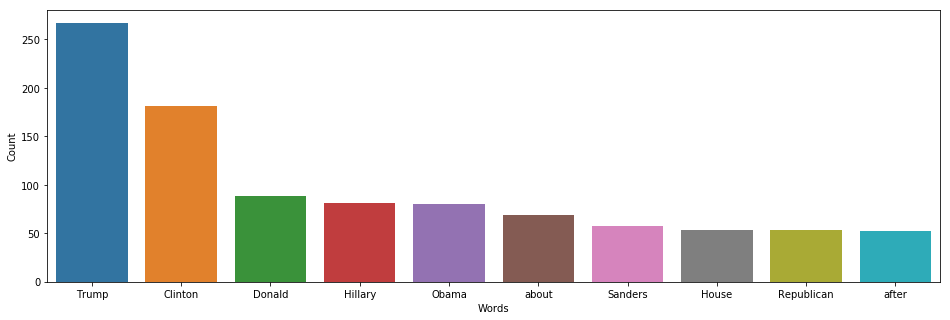

In [21]:
# Looking at the real news
realNewsBarPlot = pd.DataFrame({'Words': list(realNewsWordFreq.keys()),
                  'Count': list(realNewsWordFreq.values())})
# Selecting top 10 most frequent words     
realNewsBarPlot = realNewsBarPlot.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=realNewsBarPlot, x= "Words", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

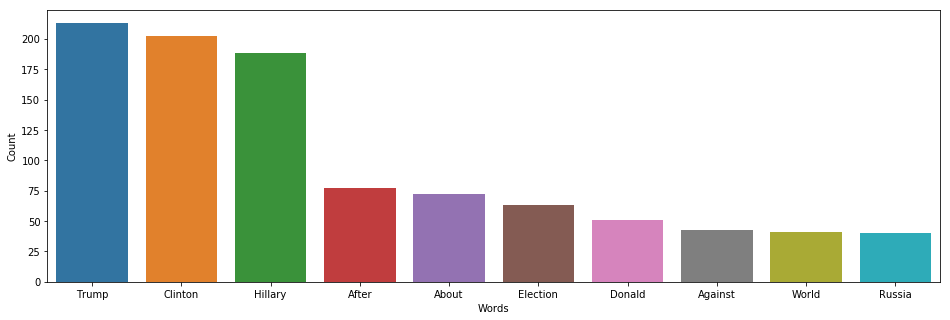

In [22]:
# Looking at the real news
fakeNewsBarPlot = pd.DataFrame({'Words': list(fakeNewsWordFreq.keys()),
                  'Count': list(fakeNewsWordFreq.values())})
# Selecting top 10 most frequent words     
fakeNewsBarPlot = fakeNewsBarPlot.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=fakeNewsBarPlot, x= "Words", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

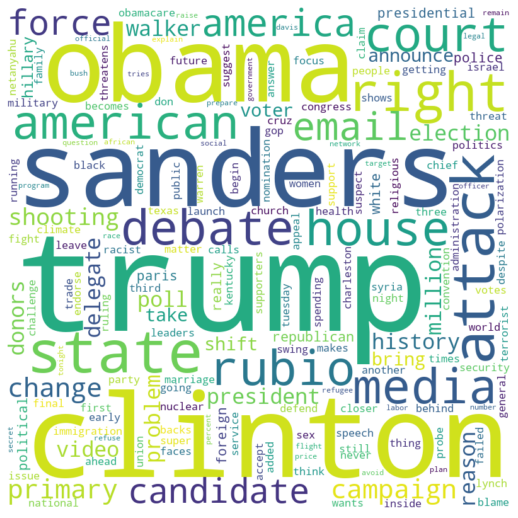

In [23]:
"""Making wordcloud for real news and fake news"""

from wordcloud import WordCloud, STOPWORDS

realwordcloud = pd.DataFrame({'Words': list(realNewsWordFreq.keys()),
                  'Count': list(realNewsWordFreq.values())})

realwordcloud = realwordcloud.nlargest(columns="Count", n =1000) 

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in realwordcloud["Words"]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

    
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = stopwords, 
                      min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (14, 7), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
 
plt.show()

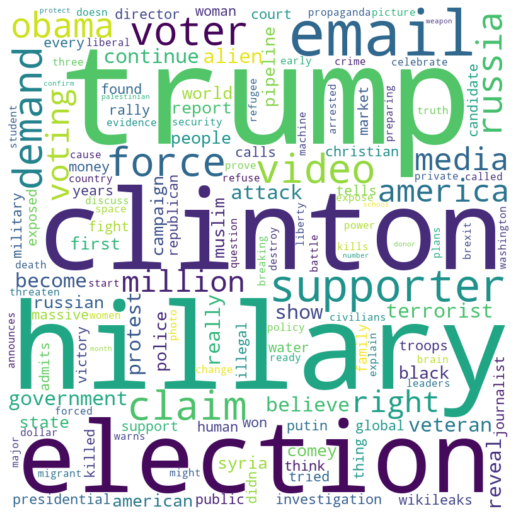

In [24]:
"""Making wordcloud for fake news"""

from wordcloud import WordCloud, STOPWORDS

fakewordcloud = pd.DataFrame({'Words': list(fakeNewsWordFreq.keys()),
                  'Count': list(fakeNewsWordFreq.values())})

fakewordcloud = fakewordcloud.nlargest(columns="Count", n =1000) 

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in fakewordcloud["Words"]: 
      
    # typecaste each val to string 
    tokens = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

    
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = stopwords, 
                      min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (14, 7), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
 
plt.show()

In [87]:
import tensorflow as tf
import random
import numpy as np
import pandas as pd
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import io

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K 

import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

K.clear_session()


In [88]:
dataText = data_news['text']
dataLabel = data_news['label']
xTrain,xTest,yTrain,yTest = train_test_split(dataText, dataLabel, test_size=0.2, random_state=7)

In [89]:
# Initalize a Tfidf vector
tfidf_vector = TfidfVectorizer(max_df=0.7)

In [90]:
# Fit and transform the train and test data
tfidf_train = tfidf_vector.fit_transform(xTrain)
tfidf_test = tfidf_vector.transform(xTest)

# Initalize PassiveAgressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,yTrain)
yPred = pac.predict(tfidf_test)

In [91]:
score = accuracy_score(yTest, yPred)
print(score)

# 592 true positive, 583 true negatives, 42 false positives, 49 false negatives
confusion_matrix(yTest, yPred, labels=['FAKE', 'REAL'])

0.9281767955801105


array([[589,  49],
       [ 42, 587]])

In [3]:
"""All the code below this was meant to be used to create another machine learning model 
however our file was massive and none of our group members could run this file on our laptop due to storage
issues and bad internet connections"""

'All the code below this was meant to be used to create another machine learning model \nhowever our file was massive and none of our group members could run this file on our laptop due to storage\nissues and bad internet connections'

In [24]:
"""Making word frequency for models"""
fake = data_news[data_news["label"] == "FAKE"]
real = data_news[data_news["label"] == "REAL"]

In [25]:
Word = {}
for word in fake["text"]:
    for item in word.split():
        if item in Word:
            Word[item] = Word[item] + 1
        else:
            Word[item] = 1 
            
for word in real["text"]:
    for item in word.split():
        if item in Word:
            Word[item] = Word[item] + 1
        else:
            Word[item] = 1    
print(len(Word))

84635


In [26]:
Distinct = []
WordDic = {}
for word in Word:
    if Word[word] != 1:
        Distinct.append(word)  

for word in Distinct:
    WordDic[word] = 0

In [ ]:
for word in Distinct:
    for item in fake["text"]:
        if word in item.split():
            WordDic[word] = WordDic[word] + 1
        else:
            WordDic[word] = WordDic[word]
    for item in real["text"]:
        if word in item.split():
            WordDic[word] = WordDic[word] + 1
        else: 
            WordDic[word] = WordDic[word] 

In [ ]:
WordList = []
Word_D = WordDic
for word in WordDic:
    if WordDic[word] > 1:
        WordList.append(word)
        
for word in list(WordDic):
    if WordDic[word] == 1:
        Word_D.pop(word)
        

In [42]:
FakeCount = {}
RealCount = {}
for char in fake["title"]:
    temp = {}
    for word in fake["title"]:
        for item in word.split():
            if item in temp:
                temp[item] = temp[item] + 1
            else:
                temp[item] = 1
    FakeCount[char] = temp
    
for char in real["title"]:
    temp = {}
    for word in real["title"]:
        for item in word.split():
            if item in temp:
                temp[item] = temp[item] + 1
            else:
                temp[item] = 1
    RealCount[char] = temp

In [43]:
matrix = {}
for char in FakeCount:
    temp = []
    for word in WordList:
        if word in FakeCount[char]:
            temp.append(FakeCount[char][word])
        else:
            temp.append(0)
    temp.append("0")
    matrix[char] = temp
    
for char in RealCount:
    temp = []
    for word in WordList:
        if word in RealCount[char]:
            temp.append(RealCount[char][word])
        else:
            temp.append(0)
    temp.append("1")
    matrix[char] = temp
        
WordList.append("Label")

In [44]:
WordCount = pd.DataFrame.from_dict(matrix, orient='index', columns = WordList)
WordCount

,daniel,greenfield,shillman,journalism,fellow,freedom,center,york,writer,focusing,...,times,compared,edgar,hoover,bizarre,headline,role,recalls,hoovers,Label
Smell Hillary’s,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Watch Exact Moment Committed Political Suicide Trump Rally (VIDEO),0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bernie supporters Twitter erupt anger against tried you!',0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Tehran,",0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Horrified Watches Boyfriend After FaceTime,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Strong Solar Storm, Risks Today Oct.26.2016 [VIDEO]",0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
America Preparing World,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Shocking! Michele Obama Hillary Caught Glamorizing Promoters,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hillary Clinton Trouble After America Noticed Thing Hidden Picture... LIBERTY WRITERS,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Episode SUNDAY WIRE: ‘Hail Deplorables’ special guest Randy,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Build the architecture of the model     
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(6216, 42424, weights=[WordCount], trainable=False),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(8, 2, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(2, return_sequences=True),
    #tf.keras.layers.LSTM(10),
    #tf.keras.layers.Dropout(0.2),  
    #tf.keras.layers.Dense(8),
    #tf.keras.layers.Dropout(0.3),  
    #tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

ValueError: Layer weight shape (6216, 42424) not compatible with provided weight shape (6216, 120)

In [55]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

train_data = WordCount.iloc[:,:21211]
test_data = WordCount.iloc[:,21211:-1]
train_labels = WordCount["Label"]
test_labels = WordCount["Label"]

history = model.fit(train_data, train_labels, epochs=5, batch_size=50, validation_data=[test_data, test_labels])

print("Training Complete")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 120)         745920    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 8)           1928      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 8)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 2)           88        
_________________________________________________________________
dense_2 (Dense)              (None, None, 2)           6         
Total params: 747,942
Trainable params: 2,022
Non-trainable params: 745,920
_________________________________________________________________
Train on 6216 samples, validate on 6216 samples
Epoch 1/5


InvalidArgumentError: Incompatible shapes: [50,1] vs. [50,29,2]
	 [[{{node metrics_5/acc/Equal}}]]

In [51]:
# Visualize the results:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

NameError: name 'history' is not defined

In [57]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import BernoulliNB
import sklearn.neighbors
from sklearn.model_selection import cross_val_score

In [58]:
train_data = WordCount.iloc[:,:21211]
test_data = WordCount.iloc[:,21211:-1]
train_labels = WordCount["Label"]
test_labels = WordCount["Label"]

model = BernoulliNB()
model.fit(train_data, train_labels) 

train_accurency = model.score(train_data, train_labels)
print("The accurency for training data is %f" %train_accurency)
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
scores_1 = cross_val_score(knn, WordCount.iloc[:,:-1], WordCount["Label"], cv=10, scoring='accuracy')
print(score_1)


The accurency for training data is 1.000000


NameError: name 'score_1' is not defined